
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_amarillo@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio A/B Testing Parametrico


#### Ejercicio 1:  Linea de montaje 

En una fabrica de componenetes textil se quiere comparar el tiempo de fabricacion de un determinado producto mediante tres métodos diferentes. Cada uno de los metodos se realizan en maquinas distintas. Se seleccionan aleatoriamente productos elaborados con cada uno de los métodos y se observa el tiempo de fabricación.  Si los tiempos de fabricacion son negativos significara que las maquinas estuvieron paradas esos minutos. 

1. ¿Se verifican los supuestos del modelo de análisis de la varianza?

2. ¿Existe evidencia de que el método influye en el tiempo medio de elaboración del producto?

3. La empresa valora que el tiempo de fabricación sea el menor posible. ¿Qué método cree que ofrece mejores resultados?

In [67]:
from scipy.stats import shapiro, bartlett
from scipy.stats import levene
from scipy.stats import ttest_ind
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
df_linea_montaje=pd.read_csv('linea_montaje.csv')
df_linea_montaje.sample(5)

,minutos,metodo
6,6.005763,A
60,3.661367,B
10,6.102908,A
75,7.668974,B
77,4.317095,B


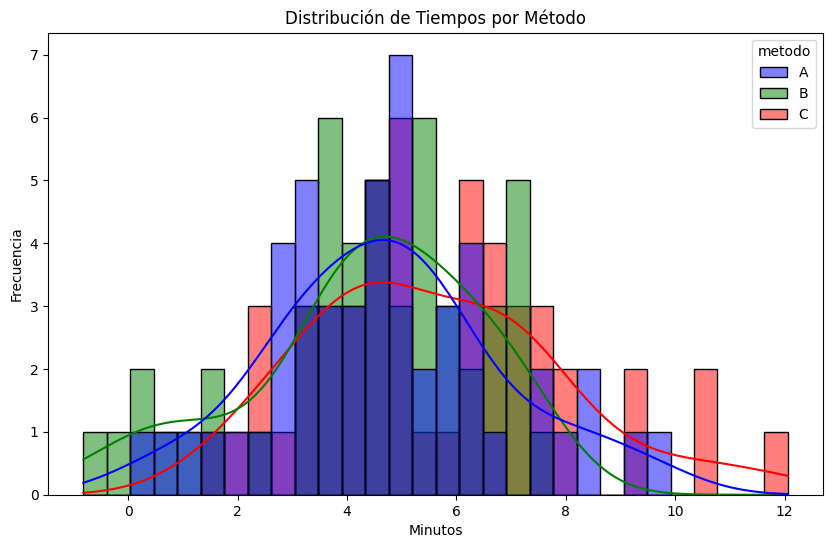

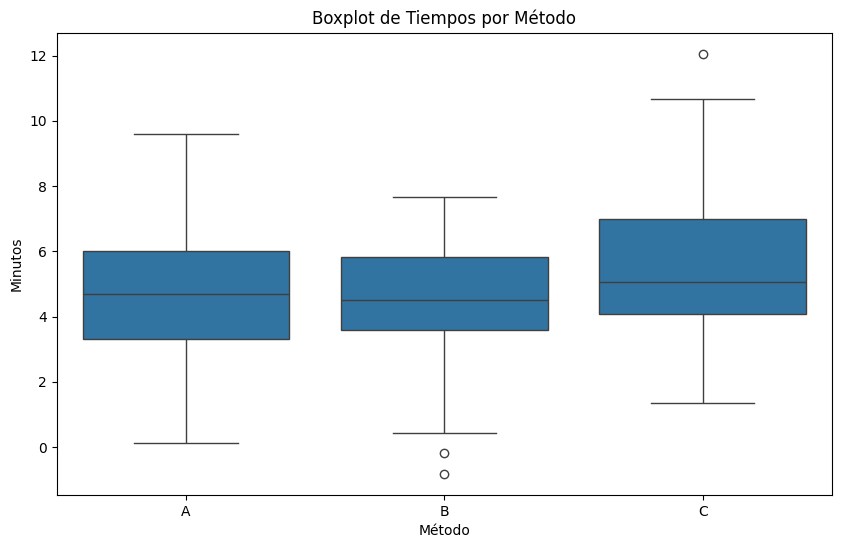

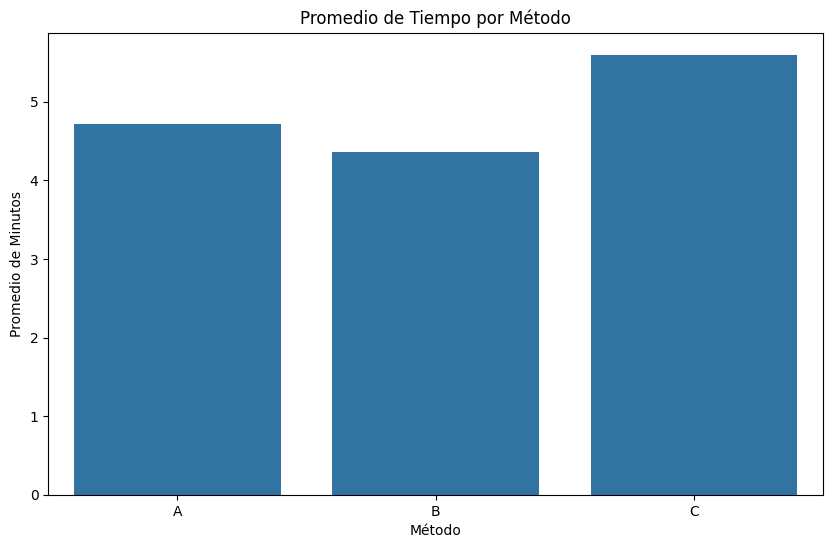

In [54]:
# Definir una paleta de colores específica para cada método
palette = {'A': 'blue', 'B': 'green', 'C': 'red'}

# Histograma de tiempos por método con colores específicos
plt.figure(figsize=(10, 6))
sns.histplot(data=df_linea_montaje, x='minutos', hue='metodo', kde=True, bins=30, palette=palette)
plt.title('Distribución de Tiempos por Método')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.show()


# Boxplot de tiempos por método
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_linea_montaje, x='metodo', y='minutos')
plt.title('Boxplot de Tiempos por Método')
plt.xlabel('Método')
plt.ylabel('Minutos')
plt.show()

# Gráfico de barras para el promedio de tiempo por método
mean_times = df_linea_montaje.groupby('metodo')['minutos'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_times, x='metodo', y='minutos')
plt.title('Promedio de Tiempo por Método')
plt.xlabel('Método')
plt.ylabel('Promedio de Minutos')
plt.show()

In [46]:
# Realizar ANOVA
modelo = sm.formula.ols('minutos ~ metodo', data=df_linea_montaje).fit()
residuos = modelo.resid

# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print("Shapiro-Wilk Test:")
print(f"Estadístico = {shapiro_test.statistic}, p-valor = {shapiro_test.pvalue}")

Shapiro-Wilk Test:
Estadístico = 0.994785038283524, p-valor = 0.8713010181164017


Dado que el p-valor es 0.8713, que es mucho mayor que 0.05, no se rechaza la hipótesis nula. Esto significa que los residuos pueden considerarse normalmente distribuidos. Por lo tanto, el supuesto de normalidad está satisfecho para el ANOVA.

In [47]:
# Prueba de Levene
levene_test = stats.levene(
    df_linea_montaje[df_linea_montaje['metodo'] == 'A']['minutos'],
    df_linea_montaje[df_linea_montaje['metodo'] == 'B']['minutos'],
    df_linea_montaje[df_linea_montaje['metodo'] == 'C']['minutos']
)
print("Prueba de Levene:")
print(f"Estadístico = {levene_test.statistic}, p-valor = {levene_test.pvalue}")

Prueba de Levene:
Estadístico = 0.5121686332045056, p-valor = 0.6002599830733366


Dado que el p-valor es 0.6003, que es mayor que 0.05, no se rechaza la hipótesis nula. Esto significa que las varianzas entre los diferentes métodos pueden considerarse homogéneas. Por lo tanto, el supuesto de homogeneidad de varianzas está satisfecho para el ANOVA.

2. ¿Existe evidencia de que el método influye en el tiempo medio de elaboración del producto?

In [48]:
# Realizar ANOVA
modelo = ols('minutos ~ metodo', data=df_linea_montaje).fit()
anova_resultado = sm.stats.anova_lm(modelo, typ=2)

print(anova_resultado)

              sum_sq     df         F    PR(>F)
metodo     40.463107    2.0  4.275128  0.015679
Residual  695.660608  147.0       NaN       NaN


Dado que el p-valor es 0.0157, que es menor que 0.05, se rechaza la hipótesis nula. Esto indica que existe evidencia estadística de que el método influye significativamente en el tiempo medio de elaboración del producto.

3. La empresa valora que el tiempo de fabricación sea el menor posible. ¿Qué método cree que ofrece mejores resultados?

In [49]:
# Calcular el promedio de tiempo por método
media_metodos = df_linea_montaje.groupby('metodo')['minutos'].mean().reset_index()
media_metodos = mean_times.sort_values(by='minutos')

print(media_metodos)

  metodo   minutos
1      B  4.364523
0      A  4.720512
2      C  5.600274


In [56]:
# Filtrar los datos del método B
metodo_b = df_linea_montaje[df_linea_montaje['metodo'] == 'B']

# Calcular el valor absoluto de todos los tiempos
valores_absolutos = metodo_b['minutos'].abs()

# Contar solo los valores positivos
valores_positivos = metodo_b[metodo_b['minutos'] > 0]['minutos']

# Calcular la media usando el total de valores absolutos y el conteo de positivos
media_b = valores_absolutos.sum() / len(valores_positivos)
media_b

np.float64(4.588299605528606)

El Método B tiene el menor tiempo medio de fabricación, con 4.36 minutos por producto, sin embargo la real es de 4.59 minutos. Aun asi, el Método B sería el más eficiente en términos de minimizar el tiempo de fabricación, y es el método que la empresa debería considerar como el mejor para optimizar la producción.

#### Ejercicio 2: Densidad de Fluidos 


La convección es un mecanismo fundamental de transferencia de calor en fluidos, que ocurre debido a las variaciones en la densidad provocadas por diferencias de temperatura. Este fenómeno se manifiesta cuando las porciones del fluido que se calientan, al volverse menos densas, ascienden hacia regiones de menor temperatura, mientras que las porciones más frías, al ser más densas, descienden hacia las zonas donde la temperatura es más alta. Este movimiento continuo da lugar a las llamadas corrientes de convección, las cuales desempeñan un papel crucial en la distribución homogénea de la temperatura dentro del fluido, promoviendo un equilibrio térmico.

En este contexto, se ha diseñado y ejecutado un experimento con el propósito de investigar cómo se ve afectada la densidad de un fluido cuando se incrementa la temperatura en una región específica del sistema; por tanto se asegura la independencia y aleatoriedad del mismo. El objetivo del experimento es comprender en detalle las modificaciones en la densidad que resultan de este aumento térmico y cómo estas afectan el comportamiento global del fluido.


1. Analiza las suposiciones del modelo: ¿Se cumplen las condiciones de homocedasticidad, independencia y normalidad?
2. ¿Tiene la temperatura un impacto notable en la densidad del fluido?
3. ¿Es posible concluir que las temperaturas de 100 y 125 provocan, en promedio, una menor densidad en el fluido comparadas con las temperaturas de 150 y 175?

In [50]:
df_densidad_fluidos=pd.read_csv('densidad_fluidos.csv')
df_densidad_fluidos.sample(5)

,temperatura,densidad
152,125,21.456759
192,125,21.553059
173,125,21.566743
289,150,21.696497
33,100,21.632134


In [51]:
df_densidad_fluidos['temperatura'].unique()

array([100, 125, 150, 175])

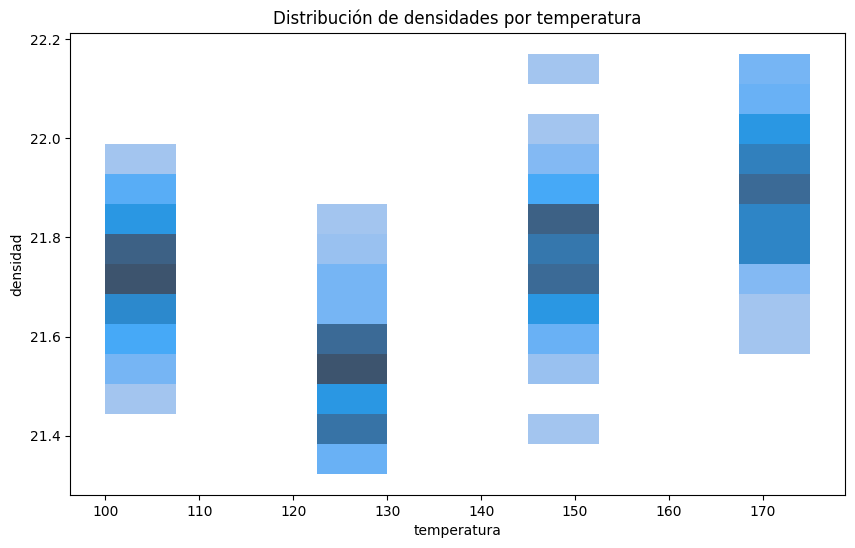

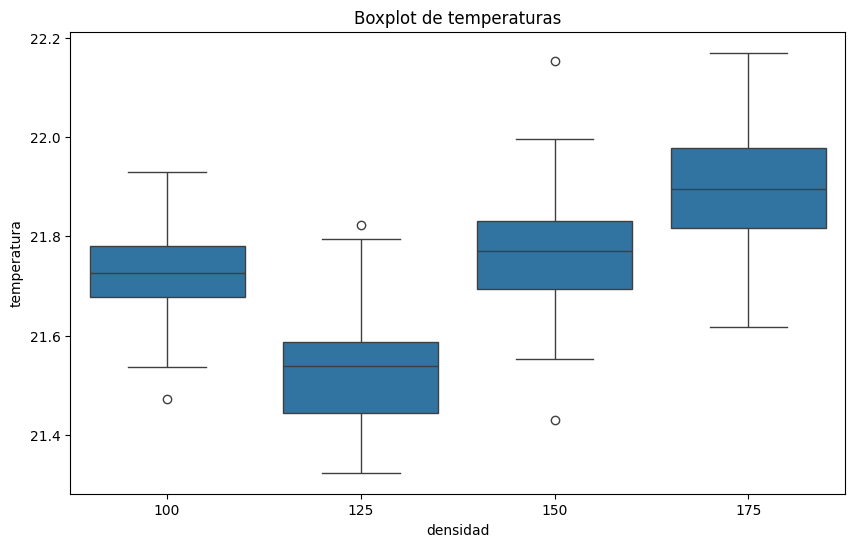

In [58]:
# Histograma de tiempos por método
plt.figure(figsize=(10, 6))
sns.histplot(data=df_densidad_fluidos, x='temperatura', y='densidad')
plt.title('Distribución de densidades por temperatura')
plt.xlabel('temperatura')
plt.ylabel('densidad')
plt.show()

# Boxplot de tiempos por método
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_densidad_fluidos, x='temperatura', y='densidad')
plt.title('Boxplot de temperaturas')
plt.xlabel('densidad')
plt.ylabel('temperatura')
plt.show()


In [61]:
# Prueba de normalidad: prueba de Shapiro-Wilk
resultado_shapiro = shapiro(residuos)
print(f"Prueba de Shapiro-Wilk: estadístico={resultado_shapiro.statistic}, p-valor={resultado_shapiro.pvalue}")

# Prueba de homocedasticidad: prueba de Levene
resultado_levene = levene(df_densidad_fluidos['densidad'], df_densidad_fluidos['temperatura'])
print(f"Prueba de Levene: estadístico={resultado_levene.statistic}, p-valor={resultado_levene.pvalue}")

Prueba de Shapiro-Wilk: estadístico=0.9911580323328363, p-valor=0.01713948757145176
Prueba de Levene: estadístico=1578.594920436633, p-valor=2.7065358525297225e-191


- Independencia: Sí, parece cumplirse. No se observa un patrón claro en el gráfico de residuos vs. valores ajustados, lo que sugiere que los residuos son independientes.

- Homoscedasticidad: No se cumple. La prueba de Levene arroja un p-valor extremadamente bajo (p<0.001), lo que indica que las varianzas no son constantes a lo largo de las observaciones.

- Normalidad: No se cumple. La prueba de Shapiro-Wilk tiene un p-valor de aproximadamente 0.017, menor que 0.05, lo que indica que los residuos no siguen una distribución normal.

2. ¿Tiene la temperatura un impacto notable en la densidad del fluido?

In [65]:
# Ajustar el modelo de regresión lineal
modelo = ols('densidad ~ temperatura', data=df_densidad_fluidos).fit()

# Mostrar el resumen del modelo
print(modelo.summary())

# Extraer coeficiente y p-valor para la variable 'temperatura'
coef_temp = modelo.params['temperatura']
p_valor_temp = modelo.pvalues['temperatura']

# Imprimir los resultados
print(f"Coeficiente de 'temperatura': {coef_temp}")
print(f"P-valor de 'temperatura': {p_valor_temp}")


                            OLS Regression Results                            
Dep. Variable:               densidad   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     133.2
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           8.75e-27
Time:                        23:43:40   Log-Likelihood:                 201.32
No. Observations:                 400   AIC:                            -398.6
Df Residuals:                     398   BIC:                            -390.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      21.3167      0.037    579.128      

- Coeficiente de 'temperatura': El valor de 0.0030 indica que por cada unidad de incremento en la temperatura, la densidad del fluido aumenta en promedio 0.003 unidades. Esto sugiere que la temperatura tiene un efecto positivo sobre la densidad.

- P-valor de 'temperatura': El valor 8.747165611282438e-27 es extremadamente pequeño, mucho menor que el umbral común de significancia de 0.05. Esto indica que existe una relación estadísticamente significativa entre la temperatura y la densidad del fluido.

3. ¿Es posible concluir que las temperaturas de 100 y 125 provocan, en promedio, una menor densidad en el fluido comparadas con las temperaturas de 150 y 175?

In [68]:
# Dividir los datos en dos grupos de temperatura
grupo_bajo = df_densidad_fluidos[df_densidad_fluidos['temperatura'].isin([100, 125])]['densidad']
grupo_alto = df_densidad_fluidos[df_densidad_fluidos['temperatura'].isin([150, 175])]['densidad']

# Calcular las medias de densidad para cada grupo
media_bajo = grupo_bajo.mean()
media_alto = grupo_alto.mean()

# Realizar la prueba t para comparar las medias
t_stat, p_value = ttest_ind(grupo_bajo, grupo_alto, equal_var=False)

# Imprimir los resultados
print(f"Media de densidad para temperaturas bajas (100 y 125): {media_bajo:.2f}")
print(f"Media de densidad para temperaturas altas (150 y 175): {media_alto:.2f}")
print(f"Estadístico t: {t_stat:.2f}")
print(f"P-valor: {p_value:.2e}")

Media de densidad para temperaturas bajas (100 y 125): 21.63
Media de densidad para temperaturas altas (150 y 175): 21.84
Estadístico t: -15.13
P-valor: 3.78e-41


El p-valor extremadamente bajo indica que la diferencia en las medias de densidad entre los dos grupos es estadísticamente significativa. Esto significa que es muy improbable que esta diferencia observada se deba al azar. Por lo tanto, podemos afirmar con confianza que las temperaturas más bajas (100 y 125) están asociadas con una menor densidad en el fluido en comparación con las temperaturas más altas (150 y 175).